In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
toyota = pd.read_csv('data/7203.T.csv')
usd_jpy = pd.read_csv('data/JPY=X.csv')

toyota['Date'] = pd.to_datetime(toyota['Date'])
usd_jpy['Date'] = pd.to_datetime(usd_jpy['Date'])

df_merge = pd.merge(toyota, usd_jpy, on='Date', how='inner')

print(df_merge.shape)
print(df_merge.info())
print(df_merge.head())

(245, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         245 non-null    datetime64[ns]
 1   Open_x       245 non-null    float64       
 2   High_x       245 non-null    float64       
 3   Low_x        245 non-null    float64       
 4   Close_x      245 non-null    float64       
 5   Adj Close_x  245 non-null    float64       
 6   Volume_x     245 non-null    int64         
 7   Open_y       245 non-null    float64       
 8   High_y       245 non-null    float64       
 9   Low_y        245 non-null    float64       
 10  Close_y      245 non-null    float64       
 11  Adj Close_y  245 non-null    float64       
 12  Volume_y     245 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 25.0 KB
None
        Date  Open_x  High_x   Low_x  Close_x  Adj Close_x  Volume_x  \
0 

In [3]:
dfX = df_merge[['Adj Close_x', 'Adj Close_y']]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfX)

In [5]:
print(np.mean(X_scaled, axis=0))
print(np.std(X_scaled, axis=0))

[1.21807326e-15 6.38038375e-16]
[1. 1.]


In [6]:
print(type(X_scaled))
print(X_scaled[:5])

<class 'numpy.ndarray'>
[[ 0.56220154 -1.58648417]
 [ 0.45548313 -1.59720919]
 [ 0.39516434 -1.79985989]
 [ 0.75243853 -1.72779346]
 [ 0.77099862 -1.74792712]]


In [7]:
dfX_scaled = pd.DataFrame(X_scaled, columns=dfX.columns)
print(type(dfX_scaled))
print(dfX_scaled.head())

<class 'pandas.core.frame.DataFrame'>
   Adj Close_x  Adj Close_y
0     0.562202    -1.586484
1     0.455483    -1.597209
2     0.395164    -1.799860
3     0.752439    -1.727793
4     0.770999    -1.747927


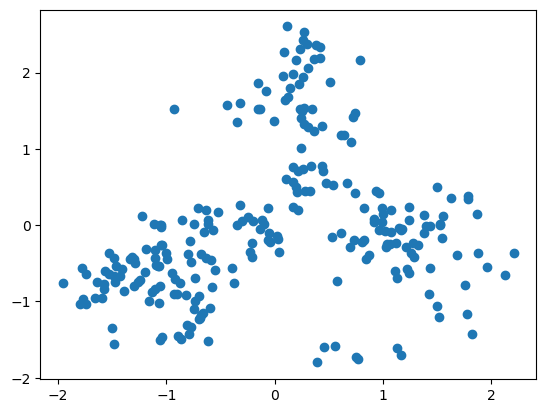

In [8]:
plt.scatter(dfX_scaled['Adj Close_x'], dfX_scaled['Adj Close_y'])

In [9]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(dfX_scaled)
    inertias.append(kmeans.inertia_)

c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

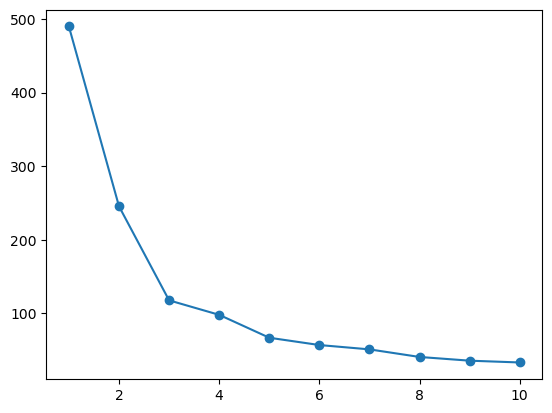

In [10]:
plt.plot(k_range, inertias, marker='o')

In [12]:
kmeans = KMeans(n_clusters=3, random_state=10)
cluster_labels = kmeans.fit_predict(dfX_scaled)
print(cluster_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1]


c:\Users\haseg\miniconda3\envs\ds2024\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
df_merge['cluster_no'] = cluster_labels
print(df_merge.head())

        Date  Open_x  High_x   Low_x  Close_x  Adj Close_x  Volume_x  \
0 2022-05-23  2052.5  2065.0  2038.0   2061.5  1996.657227  20585700   
1 2022-05-24  2064.5  2078.0  2050.0   2050.0  1985.518921  18717900   
2 2022-05-25  2040.0  2067.0  2037.0   2043.5  1979.223389  18929300   
3 2022-05-26  2065.0  2106.0  2060.5   2082.0  2016.512451  23739700   
4 2022-05-27  2117.0  2117.0  2079.0   2084.0  2018.449585  19511600   

       Open_y      High_y       Low_y     Close_y  Adj Close_y  Volume_y  \
0  127.903000  127.932999  127.167000  127.903000   127.903000         0   
1  127.846001  128.050003  126.391998  127.846001   127.846001         0   
2  126.768997  127.415001  126.675003  126.768997   126.768997         0   
3  127.152000  127.559998  126.569000  127.152000   127.152000         0   
4  127.044998  127.210999  126.677002  127.044998   127.044998         0   

   cluster_no  
0           2  
1           2  
2           2  
3           2  
4           2  


In [15]:
cluster_counts = df_merge['cluster_no'].value_counts().sort_index()
print(cluster_counts)
max_cluster = cluster_counts.idxmax()
max_count = cluster_counts.max()
print(f'Max cluster: {max_cluster}, Count: {max_count}')

cluster_no
0    111
1     60
2     74
Name: count, dtype: int64
Max cluster: 0, Count: 111


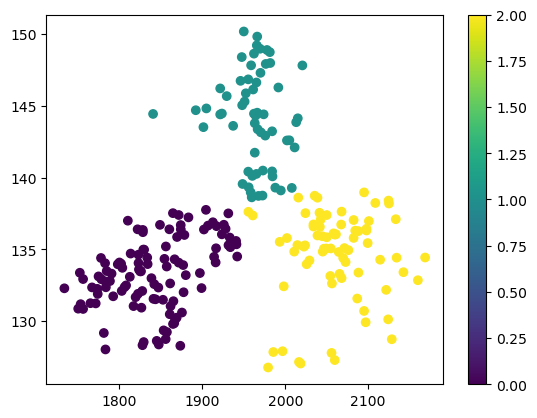

In [16]:
plt.scatter(df_merge['Adj Close_x'], df_merge['Adj Close_y'], c=df_merge['cluster_no'], cmap='viridis')
plt.colorbar()

### 各クラスタの特徴

クラスタ0（緑色）: TOYOTA株価が低く、USD/JPY為替レートも低い時期。円高かつ株価低迷の期間を表している。

クラスタ1（紫色）: TOYOTA株価が中程度で、USD/JPY為替レートが高い時期。円安進行により輸出企業であるTOYOTAにとって有利な環境。

クラスタ2（黄色）: TOYOTA株価が高く、USD/JPY為替レートが中程度の時期。株価上昇局面で、為替の影響を受けながらも企業業績が好調な期間。

各クラスタは為替レートと株価の組み合わせによって、異なる市場環境や経済情勢を反映していることが分かります。

In [17]:
centers = kmeans.cluster_centers_
max_cluster_center = centers[max_cluster]
print(f"最大クラスタの中心座標: ({max_cluster_center[0]:.2f}, {max_cluster_center[1]:.2f})")

最大クラスタの中心座標: (-0.92, -0.57)


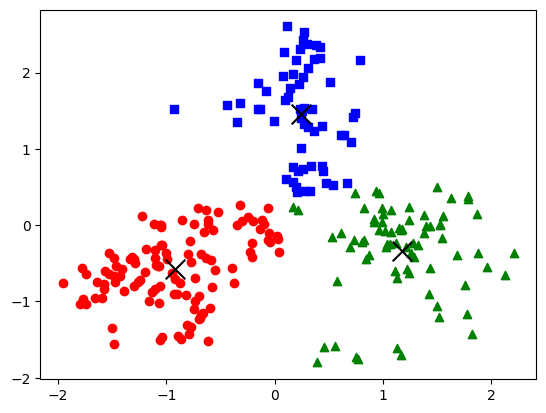

In [19]:
for i in range(3):
    colors = ['red', 'blue', 'green']
    markers = ['o', 's', '^']
    cluster_data = dfX_scaled[df_merge['cluster_no'] == i]
    plt.scatter(cluster_data['Adj Close_x'], cluster_data['Adj Close_y'], c=colors[i], marker=markers[i], label=f'クラスタ{i}')

for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='black', marker='x', s=200)